In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Problem 1

a)

redshift : 

$(1+z) = \frac{a(t_{o})}{a(t_{e})}$

solving for $a(t_{e})$ for each redshift:

$a(t_{e}) = \frac{a(t_{o})}{(1+z)} = \frac{1}{(1+z)}$

$a(t_{e,1}) = \frac{1}{(1+z_{1})}$  & $a(t_{e,2}) = \frac{1}{(1+z_{2})}$ 

By using the determined scale factor of time of emission from the nearest galaxy we may use it as the present scale factor of observation (that for z=0 is 1), the relative redshift between the two galaxies would then be:

$(1+z_{1,2}) = \frac{a(t_{e,1})}{a(t_{e,2})} = \frac{(1 + z_{2})}{(1 + z_{1})} $

In [4]:
def redshift(z_1,z_2):
    '''Calculates the relative redshift between
    two objects with redshift z1,and z2.'''
    return (1+z_2)/(1+z_1)-1.0

b)

The angular diameter distance is defined as, where $d_{L}$ is the luminosity distance, and $d_{p}$ is the proper distance:

$d_{A} = \frac{d_{L}}{(1+z)^{2}} = \frac{d_{p}}{(1+z)} $

While the proper distance for a single component universe is defined as:

$d_{p} = c \int^{t}_{t_{e}} \frac{dt}{a(t)} = \frac{2c}{H_{0} (1+3\omega)}[1-(1+z)^{-(1+3\omega)/2}]$

For a Einstein-deSitter universe ($\Omega_{m} = 1$), $\omega$ = 0 thus the previous equation reduces to:

$d_{p} = \frac{2c}{H_{0}}[1-(1+z)^{-1/2}]$ (From time of observation) or

$d_{p} = \frac{2c}{H_{0}(1+z)}[1-(1+z)^{-1/2}]$ (From time of emission)

Thus the angular diameter distance becomes:

$d_{A} = \frac{2c}{H_{0}}[(1+z)^{-1}-(1+z)^{-3/2}]$

In [5]:
def ang_dia_dist(z):
    '''Calculates the angular diameter distance for an Einstein-
    deSitter Universe.
    
    RETURNS: angular diameter distance in Mpc'''
    
    c = 299792e3
    H_0 = 70e3 / 3.086e22
    return (2*c/H_0)*((1+z)**-1-(1+z)**(-3.0/2.0))/3.086e22

In [6]:
print "Nearest galaxy's Angular Diameter Distance:", ang_dia_dist(0.5)
print "Furthest galaxy's Angular Diameter Distance:",ang_dia_dist(1.6)
z12 = redshift(0.5,1.6)
print 'Relative redshift between the two galaxies:', z12
print "Angular Diameter Distance between the two galaxies:",ang_dia_dist(z12)

Nearest galaxy's Angular Diameter Distance: 1047.86394306
Furthest galaxy's Angular Diameter Distance: 1251.30653011
Relative redshift between the two galaxies: 0.733333333333
Angular Diameter Distance between the two galaxies: 1188.19169913


c) These results seem consistent with what one would expect. As redshift increases the angular diameter distance increases and therefore the angular size decreases. If we assume that the galaxies have the same intrinsic size, the furthest galaxy that has the largest $d_{A}$ will appear smaller than the closest galaxy that has the smallest value for $d_{A}$ leading to a larger angular size. Note however that our galaxies have yet to reach the critical redshift that maximizes the angular diameter distance. 

The value for the angular diameter distance between the two galaxies appears to be reasonable, since the determined redshift of the furthest galaxy receding from the nearest galaxy is greater than that of the nearest galaxy. This means that galaxy 2 is further away from galaxy 1, compared to galaxy 1 from us. 

Problem 2

The mean number density:

$n = \frac{N}{\frac{4}{3}\pi r_{h}^{3}}$

While the mean free path is defined as:

$l = (n \Sigma)^{-1}$

The average time between collisions:

$\tau = \frac{l}{\sqrt{\langle v^{2} \rangle}} = \frac{l}{\sqrt{3}\sigma}$

In [7]:
n = (1e3)/(4.0*np.pi*1.5**3/3.0)
print 'n =', n , '[galaxies Mpc^-3]'

l = (n*1e-3)**-1
print 'l =', l , '[Mpc]'

t = (l/(np.sqrt(3)*880e3/3.086e22))/(365*24*3600*1e9)
print 't =', t , '[Gyr]'

n = 70.7355302631 [galaxies Mpc^-3]
l = 14.1371669412 [Mpc]
t = 9.07629079433 [Gyr]


The mean free time between collisions is less than the Hubble time (~13.5 Gyrs), therefore galaxy mergers and collisions are likely to be observable in the Coma Cluster.

In [8]:
t2 = (0.7*3.086e22/120e3)/(365*24*3600*1e9)
print 'Time for M33 & Milky Way collision =', t2, '[Gyr]'

Time for M33 & Milky Way collision = 5.70829105361 [Gyr]


The mean free time between collisions in the Coma cluster is nearly twice as long as the approximate collision time between Andromeda and the Milky Way galaxy. From the previous formulas we can see that the mean free path is proportional to the mean free path between collisions, which happens to be a factor of 20 less for M33 & Milky Way. Additionally the time is inversely proportional to the velocity dispersion that happens to be ~1/4th of the Coma cluster, this leads to an approximate factor of 2 difference.

PART 2

In [160]:
from scipy.integrate import quad
class GravLens:
    """Class structure for Gavitational lensing of a point mass
    and soon to come singular isothermal sphere mass distribution."""
    
    def __init__(self, d_l,d_s,M, mass_dist = 'point'):
        '''
        Initialization of constants and variables.
        
        INPUTS:
        d_l: scalar float, distance to lens in units of [pc]
        d_s: scalar float, distance to Source in units of [pc]
        M:   scalar float, mass of point source in units of [solar masses]
        '''
        
        self.G = 6.67e-11 #[N m^2 kg^-2]
        self.m_solar = 1.988435e30 #[kg]
        self.c = 299792e3 #[m s^-1]
        self.pc = 3.086e16 #[m]
        
        self.d_l = d_l*self.pc
        self.d_s = d_s*self.pc
        self.d_ls = (d_s-d_l)*self.pc
        
        if mass_dist == 'point':
            self.m = M*self.m_solar #scalar
            self.theta_e = ((4.0*self.G*self.m/self.c**2.0)*(self.d_ls/(self.d_l*self.d_s)))**0.5
        elif mass_dist == 'sis':
            self.crit_mass = self.c**2*self.d_s/(4*np.pi*self.G*self.d_ls*self.d_l)
        else:
            pass
            
        self.lensed_frame = None
        self.unlens_frame = None
        self.mask = None
        pass
    
    def beta_point(self, theta):
        '''
        The lens equation solved for the beta angle. 
        
        INPUTS:
        theta: scalar or array like, the lensed location of the object 
        from the central axis in units of [radians]
        
        RETURNS:
        beta: scalar or array like, the actual location of the object
        from the central axis in units of [radians]
        '''
        return theta - (self.d_ls/(self.d_s*self.d_l))*(4.0*self.G*self.m)/(self.c**2.0*theta)  
    
    def lensed_coord_frame(self,scale_factor=2,px=100):
        '''
        Initialization of a lensed (observed) coordinate grid.
        
        INPUTS:
        scale_factor: int, sets the extent of the coordinate grid
        in terms of the einstein ring angular radius.
        
        RETURNS:
        A dictionary containing cartesian and polar forms of the 
        generated coordinate grid both in terms of [radians]
        '''
        xx=np.linspace(-self.theta_e,self.theta_e,num=px)
        xx*=scale_factor
        yy=np.linspace(-self.theta_e,self.theta_e,num=px)
        yy*=scale_factor
        XY = np.meshgrid(xx,yy)     
        self.lensed_frame = {'x':XY[0],
                             'y':XY[1],
                             'theta':(XY[0]**2+XY[1]**2)**0.5,
                             'phi':np.arctan2(XY[1],XY[0])}
        pass
    
    def unlens_coord_transform(self):
        '''
        A helper function that uses self.beta_point() to
        map the observed coordinate grid to the actual
        coordinate grid.
        
        INPUTS: n/a
        
        RETURNS:
        A dictionary containing the cartesian and polar
        forms of the transformed coordinate grid. Note 
        indecies are 1:1 mapped with the observed coordinates.
        
        '''
        
        
        beta = self.beta_point(self.lensed_frame['theta'])
        self.unlens_frame = {'x': beta*np.cos(self.lensed_frame['phi']),
                             'y':beta*np.sin(self.lensed_frame['phi']),
                             'beta':beta}
        pass
    
    def obj_mask(self,radius,center=[0,0]):
        '''
        Circular masks on the un-lensed coordinate grid. 
        '''
        cx,cy = center
        return ((self.unlens_frame['x']-cx)**2+(self.unlens_frame['y']-cy)**2<=radius**2) 

    def make_plot(self,radius,center=[0,0],ax=None):
        '''
        Plotting function...
        '''
        if ax is None:
            ax = plt.gca() 
            
        gamma = np.linspace(0,2*np.pi)
        e_ring = [self.theta_e*np.cos(gamma),self.theta_e*np.sin(gamma)]    
            
        mask = self.obj_mask(radius,center=center)
        self.mask = mask
        ax.plot(e_ring[0],e_ring[1],ls='--',color='black',label='Einstein Ring')
        ax.scatter(self.lensed_frame['x'][mask].ravel(),self.lensed_frame['y'][mask].ravel(),
            color = 'r',edgecolor='None',marker='.',s=5,label='Lensed')
        ax.scatter(self.unlens_frame['x'][mask].ravel(),self.unlens_frame['y'][mask].ravel(),
            color = 'g', edgecolor='None',marker='.',s=5,label='Unlensed')
        ax.scatter(0,0,marker='+',color='black',s=50)
        ax.grid(True)
        ax.set_xlabel(r'$\theta_{x} [rad]$',fontsize=14)
        ax.set_ylabel(r'$\theta_{y} [rad]$',fontsize=14)
        ax.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
        ax.set_aspect('equal')
        return ax
    
    def proj_potential_integrand(self,R,v_dispersion,r):
        '''Projected SIS density as z-> goes to inf'''
        return (v_dispersion**2*np.log(abs(R-r)))/(2.0*self.G*r*self.crit_mass)
    
    def psi(self,R,v_dispersion,r):
        return quad(self.proj_potential_integrand, 0,R,args=(v_dispersion,r))


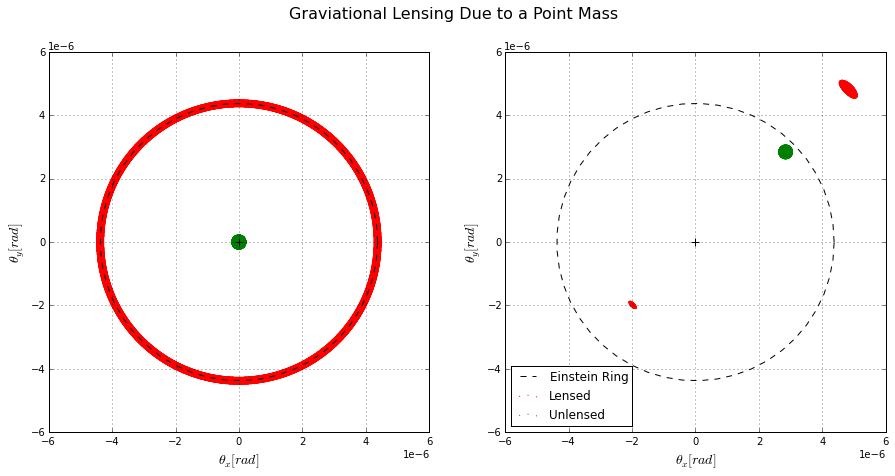

In [293]:
x = GravLens(5000,10000,1e6)
x.lensed_coord_frame(px=2400)
x.unlens_coord_transform()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
x.make_plot(x.theta_e*0.05,center=[x.theta_e*0.00,x.theta_e*0.00],ax=ax1)
x.make_plot(x.theta_e*0.05,center=[x.theta_e*0.65,x.theta_e*0.65],ax=ax2)
plt.suptitle('Graviational Lensing Due to a Point Mass',fontsize=16)
plt.legend(loc=3)
plt.show()
fig.tight_layout()

In [11]:
import matplotlib.image as mpimg
from scipy.spatial import cKDTree

img=mpimg.imread('HUDF-full-7.jpg')
tree=cKDTree(np.array([x.lensed_frame['x'].ravel(),x.lensed_frame['y'].ravel()]).T)
distances,indices = tree.query(np.array([x.unlens_frame['x'].ravel(),x.unlens_frame['y'].ravel()]).T,k=2)
r_vals = img[:,:,0].ravel()[indices]
dw_r = np.average(r_vals, weights=(1. / np.exp(distances**2.0)),axis=1).reshape(2400,2400)


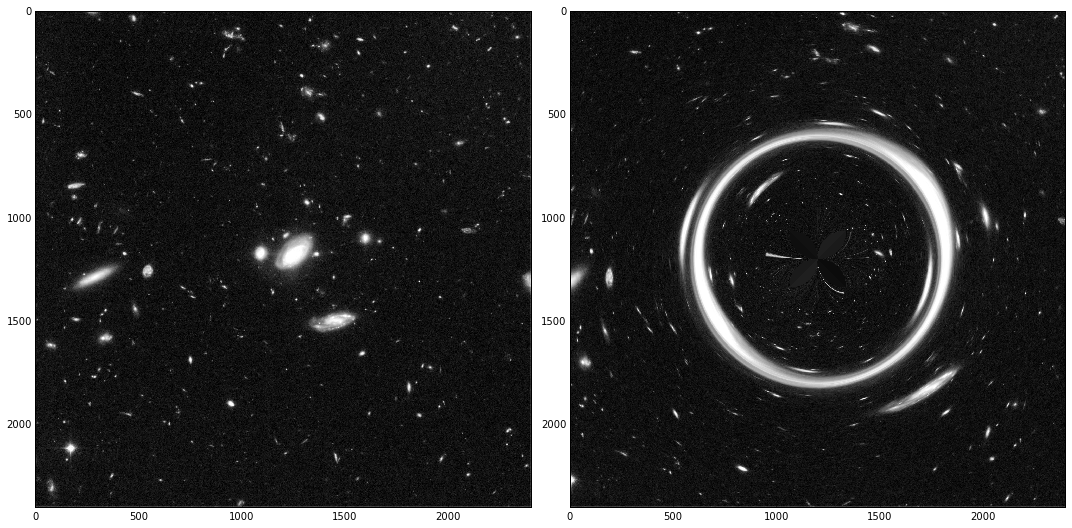

In [12]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,10))
ax1.imshow(img[:,:,0],cmap='gray',interpolation='none')
ax2.imshow(dw_r,cmap='gray',interpolation='none')
fig.tight_layout()

In [310]:
x = GravLens(5000,10000,1e7,mass_dist='sis')

In [309]:
x.crit_mass

1389851.6613746434

In [241]:
#figure(figsize=(6,6))
xx = np.linspace(-10,10,100)
yy = np.linspace(-10,10,100)
XX,YY = np.meshgrid(xx,yy)
#imshow(x.mass_density_profile(100e3,np.sqrt(XX**2+YY**2))/x.crit_mass)
r = np.sqrt(XX**2+YY**2).ravel()
print len(xx)

100


<matplotlib.colorbar.Colorbar instance at 0x7fb672bea680>

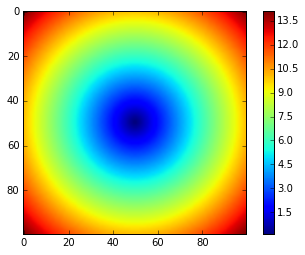

In [242]:
imshow(r.reshape((100,100)))
colorbar()

In [243]:
proj_potential = np.vectorize(x.psi)

In [244]:

temp = (proj_potential(0.1*x.pc,100e3,np.sqrt(XX**2+YY**2)*x.pc))

(0.0, 100.0, 0.0, 100.0)

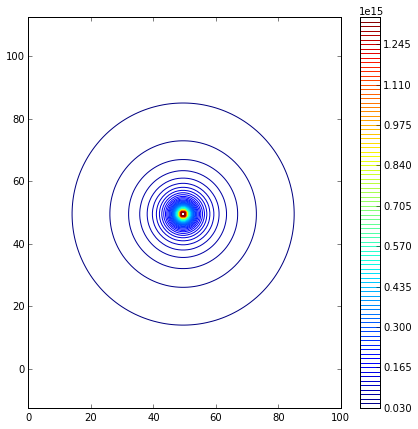

In [245]:
figure(figsize=(7,7))
contour(temp[0],100)
colorbar()
axis('equal')

In [246]:
def hessian_array(potential_array):
    x_len,y_len = np.shape(potential_array)
    hess_array = np.zeros((x_len,y_len,2,2))
    hess_array[:,:,0,0] = np.gradient(np.gradient(potential_array)[0])[0]
    hess_array[:,:,0,1] = np.gradient(np.gradient(potential_array)[0])[1]
    hess_array[:,:,1,0] = np.gradient(np.gradient(potential_array)[1])[0]
    hess_array[:,:,1,1] = np.gradient(np.gradient(potential_array)[1])[1]
    return hess_array

def shear_tensor(hess_arr):
    A = np.zeros_like(hess_arr)
    k = 0.5*(hess_arr[:,:,0,0]+hess_arr[:,:,1,1])
    g1 = 0.5*(hess_arr[:,:,0,0]-hess_arr[:,:,1,1])
    g2 = hess_arr[:,:,0,1]
    A[:,:,0,0]+= (1-k-g1)
    A[:,:,0,1]+= (-g2)
    A[:,:,1,0]+= (-g2)
    A[:,:,1,1]+= (1-k-g1)
    return A

In [247]:
temp2 = np.sum(np.array(temp)**2,axis=0)**0.5

(40, 60)

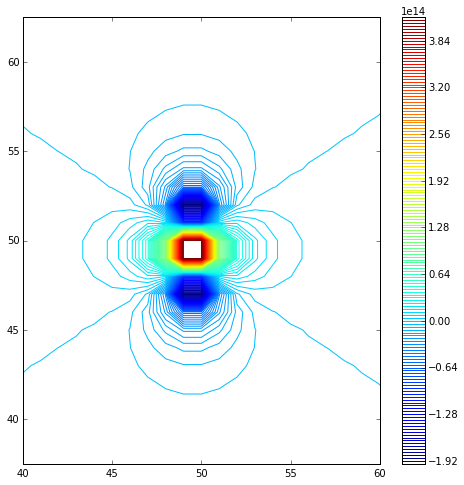

In [315]:
figure(figsize=(8,8))
hess_arr = hessian_array(temp2)

axis('equal')
contour(shear_tensor(hess_arr)[:,:,0,0],200)
#contour(shear_tensor(hess_arr)[:,:,0,1],100)
#contour(shear_tensor(hess_arr)[:,:,1,0],100)
#contour(shear_tensor(hess_arr)[:,:,1,1],100)
colorbar()
xlim(40,60)
ylim(40,60)

In [250]:
coords = np.array((XX.ravel(),YY.ravel()))

In [251]:
vect = np.dstack((XX,YY))
new_vect = np.zeros_like(vect)
A = shear_tensor(hess_arr)

for i in range(np.shape(A)[0]):
    for j in range(np.shape(A)[1]):
        new_vect[i,j] +=  np.array(np.matrix(A[i,j])*np.matrix(vect[i,j]).T).T[0]

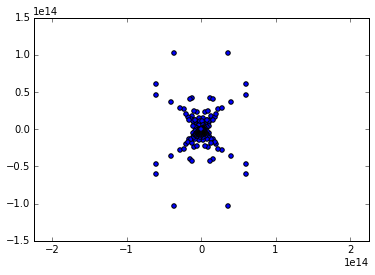

In [278]:
axis('equal')
scatter(new_vect[:,:,0].ravel(),new_vect[:,:,1].ravel())


In [284]:

x_len,y_len,z_len = np.shape(new_vect)
obj_coords = np.zeros((x_len,y_len))
for i in range(x_len):
    for j in range(y_len):
        if np.sum((new_vect[i,j,0] - [x.pc*0.0001,0])**2)<=(1e14*0.05)**2:
            obj_coords[i,j] = 1.0
        else:
            obj_coords[i,j] = 0.0
            

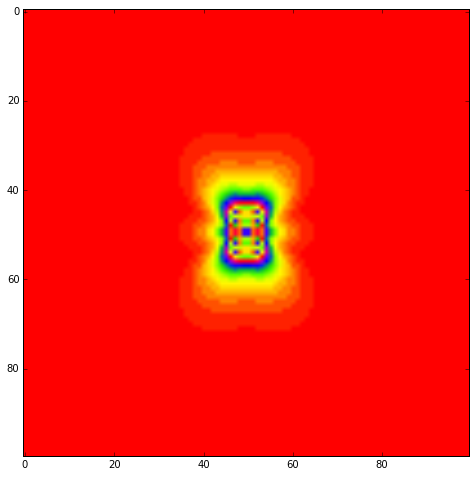

In [306]:
figure(figsize=(8,8))
imshow( np.sqrt(new_vect[:,:,0]**2+new_vect[:,:,1]**2),cmap='prism')

<matplotlib.colorbar.Colorbar instance at 0x7fb678050098>

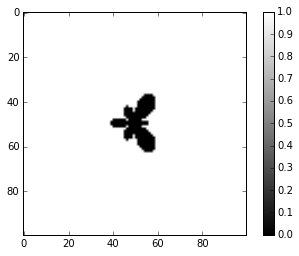

In [285]:
imshow(obj_coords,cmap='gray')
colorbar()
#xlim(40,60)
#ylim(40,60)

In [150]:
new_vect[0,0]

array([  5.45249846e+10,   5.45249846e+10])

In [292]:
x.lensed_frame

AttributeError: 'NoneType' object has no attribute 'keys'

<matplotlib.colorbar.Colorbar instance at 0x7fb678c710e0>

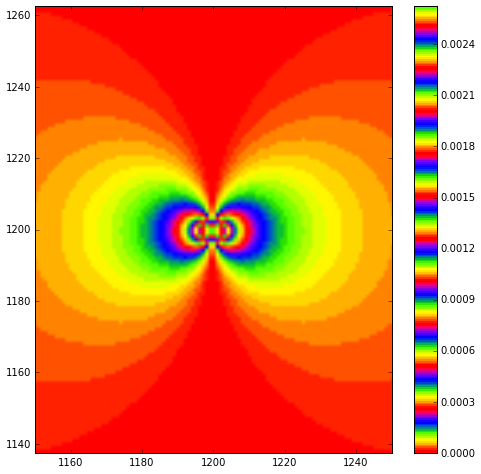

In [307]:
figure(figsize=(8,8))
axis('equal')
imshow(np.sqrt(x.unlens_frame['x']**2,x.unlens_frame['y']**2),cmap='prism')
xlim(1150,1250)
ylim(1150,1250)
colorbar()

(40, 60)

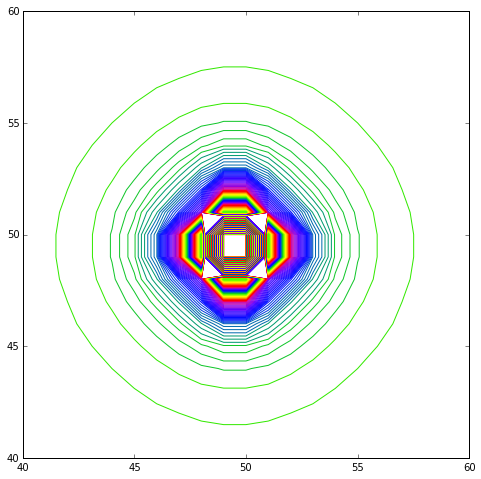

In [276]:
from scipy.ndimage.filters import laplace 
figure(figsize=(8,8))
axis('equal')
contour(0.5*laplace(temp2),1000,cmap='prism')
xlim(40,60)
ylim(40,60)